Idea:
Gradient Boosting builds trees sequentially, where each new tree tries to correct the errors made by the previous ones.
It’s slower than Random Forests, but can achieve higher accuracy when tuned properly.

In [1]:
# Gradient Boosting Classifier Example
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = load_wine()
X = data.data
y = data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [2]:
# Initialize model
gb_model = GradientBoostingClassifier(
    n_estimators=100,        # number of boosting stages
    learning_rate=0.1,       # how much each tree contributes
    max_depth=3,             # depth of individual trees
    random_state=42
)

# Train
gb_model.fit(X_train, y_train)


GradientBoostingClassifier(random_state=42)

Accuracy: 0.9074074074074074

Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.93        19
           1       0.90      0.90      0.90        21
           2       1.00      0.79      0.88        14

    accuracy                           0.91        54
   macro avg       0.92      0.90      0.90        54
weighted avg       0.91      0.91      0.91        54



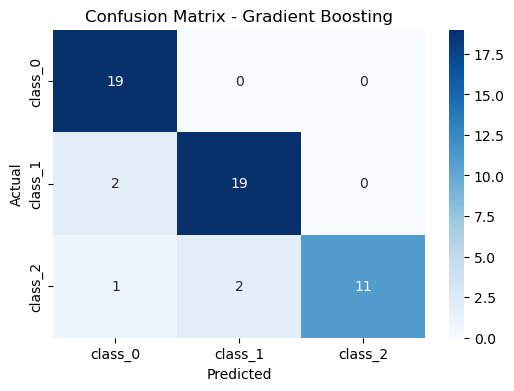

In [3]:
# Predictions
y_pred = gb_model.predict(X_test)

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Gradient Boosting")
plt.show()


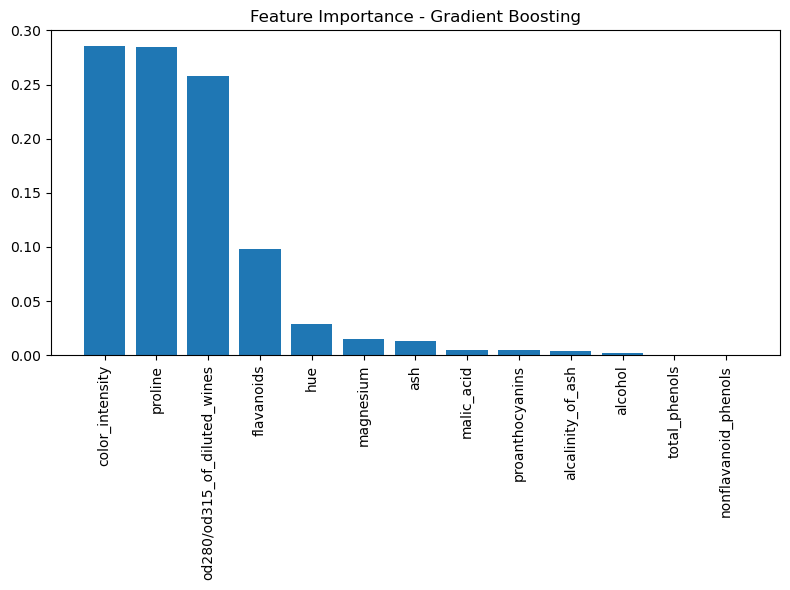

In [4]:
# Feature Importances
importances = gb_model.feature_importances_
indices = importances.argsort()[::-1]

plt.figure(figsize=(8,6))
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), [data.feature_names[i] for i in indices], rotation=90)
plt.title("Feature Importance - Gradient Boosting")
plt.tight_layout()
plt.show()


In [ ]:
# Testing different learning rates
for lr in [0.01, 0.05, 0.1, 0.2]:
    model = GradientBoostingClassifier(learning_rate=lr, random_state=42)
    model.fit(X_train, y_train)
    print(f"Learning Rate: {lr:.2f} | Accuracy: {model.score(X_test, y_test):.3f}")


Learning Rate: 0.01 | Accuracy: 0.889
Learning Rate: 0.05 | Accuracy: 0.907
Learning Rate: 0.10 | Accuracy: 0.907
Learning Rate: 0.20 | Accuracy: 0.944


In [6]:
# Comparing with Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

print("Random Forest Accuracy:", rf.score(X_test, y_test))
print("Gradient Boosting Accuracy:", gb_model.score(X_test, y_test))


Random Forest Accuracy: 1.0
Gradient Boosting Accuracy: 0.9074074074074074


Random forest outperformed as Gradient Boosting did not have hyperparameters tuned. It is completely possible for Random Forest to outperform Gradient Boosting in that case.